In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
current_path=os.getcwd()
current_path

'd:\\MY_WORK\\training_projects-main\\deep_learning\\Data'

In [3]:
print("total cats images:-",len(os.listdir(os.path.join (current_path, 'images', 'cats'))))

total cats images:- 349


In [4]:
image_dir=os.path.join(current_path, 'images')
image_dir

'd:\\MY_WORK\\training_projects-main\\deep_learning\\Data\\images'

In [6]:
cat_dog_dict={'cats':[], 'dogs':[]}
for dir in os.listdir(image_dir):
    directory_path=os.path.join(image_dir,dir)
    for images in os.listdir(directory_path):
        cat_dog_dict[dir].append(os.path.join(directory_path,images))
cat_dog_dict

{'cats': ['d:\\MY_WORK\\training_projects-main\\deep_learning\\Data\\images\\cats\\cat_1.jpg',
  'd:\\MY_WORK\\training_projects-main\\deep_learning\\Data\\images\\cats\\cat_10.jpg',
  'd:\\MY_WORK\\training_projects-main\\deep_learning\\Data\\images\\cats\\cat_100.jpg',
  'd:\\MY_WORK\\training_projects-main\\deep_learning\\Data\\images\\cats\\cat_101.jpg',
  'd:\\MY_WORK\\training_projects-main\\deep_learning\\Data\\images\\cats\\cat_102.jpg',
  'd:\\MY_WORK\\training_projects-main\\deep_learning\\Data\\images\\cats\\cat_103.jpg',
  'd:\\MY_WORK\\training_projects-main\\deep_learning\\Data\\images\\cats\\cat_104.jpg',
  'd:\\MY_WORK\\training_projects-main\\deep_learning\\Data\\images\\cats\\cat_106.jpg',
  'd:\\MY_WORK\\training_projects-main\\deep_learning\\Data\\images\\cats\\cat_109.jpg',
  'd:\\MY_WORK\\training_projects-main\\deep_learning\\Data\\images\\cats\\cat_11.jpg',
  'd:\\MY_WORK\\training_projects-main\\deep_learning\\Data\\images\\cats\\cat_111.jpg',
  'd:\\MY_WORK\\t

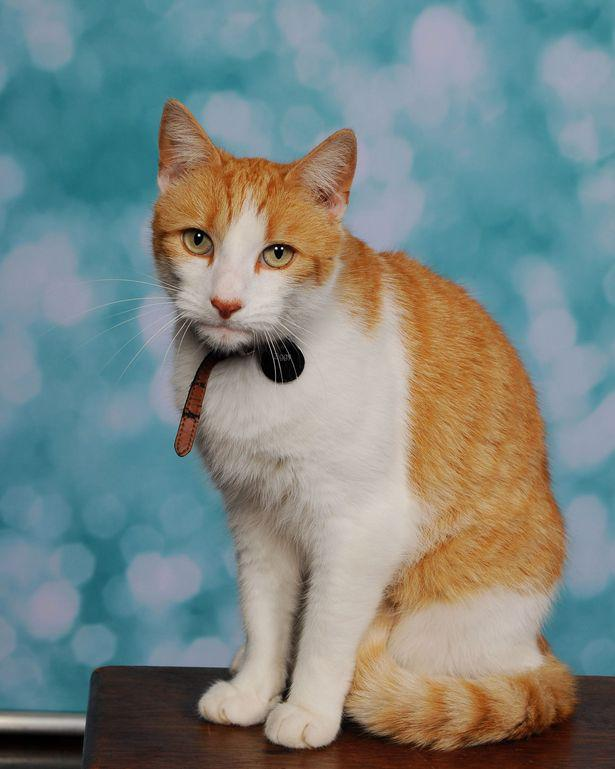

In [8]:
from PIL import Image
Image.open(cat_dog_dict['cats'][0])

In [9]:
cat_dog_dict.keys()

dict_keys(['cats', 'dogs'])

In [10]:
import cv2
img_arr_lst=[ ]
labels=[]
for key , val in cat_dog_dict.items():
    for img in val:
        img_arr=cv2.imread(img)
        resized_img=cv2.resize(img_arr,(224,224))
        img_arr_lst.append(resized_img)
        labels.append(key)
img_arr_lst

[array([[[156, 141,  92],
         [159, 144, 102],
         [159, 145, 112],
         ...,
         [152, 142,  75],
         [156, 144,  80],
         [160, 148,  84]],
 
        [[151, 136,  87],
         [155, 140,  97],
         [157, 143, 107],
         ...,
         [151, 140,  75],
         [154, 142,  77],
         [157, 145,  81]],
 
        [[150, 136,  86],
         [155, 141,  96],
         [155, 140, 102],
         ...,
         [151, 139,  75],
         [153, 141,  77],
         [157, 145,  81]],
 
        ...,
 
        [[ 81,  90,  99],
         [ 77,  86,  95],
         [ 79,  88,  97],
         ...,
         [ 37,  42,  60],
         [ 39,  42,  57],
         [ 40,  43,  58]],
 
        [[ 52,  59,  59],
         [ 54,  60,  61],
         [ 51,  57,  58],
         ...,
         [ 40,  44,  59],
         [ 42,  45,  60],
         [ 43,  46,  61]],
 
        [[ 37,  41,  36],
         [ 33,  37,  34],
         [ 35,  38,  35],
         ...,
         [ 40,  43,  56],
  

In [11]:
img_arr_lst=np.array(img_arr_lst)
img_arr_lst.shape

(697, 224, 224, 3)

In [12]:
labels=np.array(labels)
labels.shape

(697,)

In [13]:
labels=np.array([1 if item=='dogs' else 0 for item in list(labels)])
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(img_arr_lst,labels,test_size=0.2)

In [15]:
x_train=x_train/255
x_test=x_test/255

In [16]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((557, 224, 224, 3), (140, 224, 224, 3), (557,), (140,))

In [17]:
model = Sequential(
    [
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ]
)

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 395ms/step - accuracy: 0.5428 - loss: 5.6959
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 407ms/step - accuracy: 0.5295 - loss: 0.6908
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.6251 - loss: 0.6739
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7539 - loss: 0.5844
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 765ms/step - accuracy: 0.8588 - loss: 0.4495
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.9167 - loss: 0.3027
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.9703 - loss: 0.1595
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 477ms/step - accuracy: 0.9909 - loss: 0.0729
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 379ms/step - accuracy: 0.9934 - loss: 0.0389
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 377ms/step - accuracy: 0.9974 - loss: 0.0176


In [19]:
pred=model.predict(x_test)
pred

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step


array([[5.05470932e-01],
       [1.33707570e-02],
       [9.18163657e-01],
       [3.89573008e-01],
       [6.52872175e-02],
       [8.04137349e-01],
       [4.99542147e-01],
       [4.92080348e-03],
       [5.93954930e-03],
       [5.40773928e-01],
       [3.97577971e-01],
       [8.22327614e-01],
       [1.43425807e-01],
       [2.33381651e-02],
       [4.20040637e-03],
       [7.75098920e-01],
       [9.68363434e-02],
       [5.81921218e-03],
       [4.12821144e-01],
       [9.84321594e-01],
       [9.65090513e-01],
       [9.37399685e-01],
       [3.29401088e-03],
       [2.86416262e-01],
       [4.94657570e-07],
       [3.58297586e-01],
       [5.64867973e-01],
       [2.68345833e-01],
       [9.83329117e-01],
       [2.34243460e-02],
       [8.80684435e-01],
       [6.90051587e-04],
       [2.02182890e-03],
       [9.93526042e-01],
       [7.58571506e-01],
       [3.82504053e-02],
       [1.42994579e-02],
       [2.86502354e-02],
       [7.56712910e-03],
       [1.72384962e-01],


In [20]:
pred=(pred>0.5).astype(int).ravel()
pred

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1])

In [21]:
y_test

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0])

In [22]:

model.save('cat_dogs_model.h5')